In [182]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [183]:
df= pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [184]:
df.shape

(32561, 15)

In [185]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [186]:
df.replace('?',np.nan )

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [187]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
education.num,0,0.0


In [188]:
df['occupation'].describe()

count              32561
unique                15
top       Prof-specialty
freq                4140
Name: occupation, dtype: object

In [189]:
df['occupation'] = df['occupation'].fillna('Prof-specialty')

In [190]:
df['workclass'].describe()

count       32561
unique          9
top       Private
freq        22696
Name: workclass, dtype: object

In [191]:
df['workclass'] = df['workclass'].fillna('Private')

In [192]:
df['native.country'].describe()

count             32561
unique               42
top       United-States
freq              29170
Name: native.country, dtype: object

In [193]:
df['native.country'] = df['native.country'].fillna('United-States')

In [194]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [195]:
df.describe(include=["O"])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education.num'}>,
        <Axes: title={'center': 'capital.gain'}>],
       [<Axes: title={'center': 'capital.loss'}>,
        <Axes: title={'center': 'hours.per.week'}>]], dtype=object)

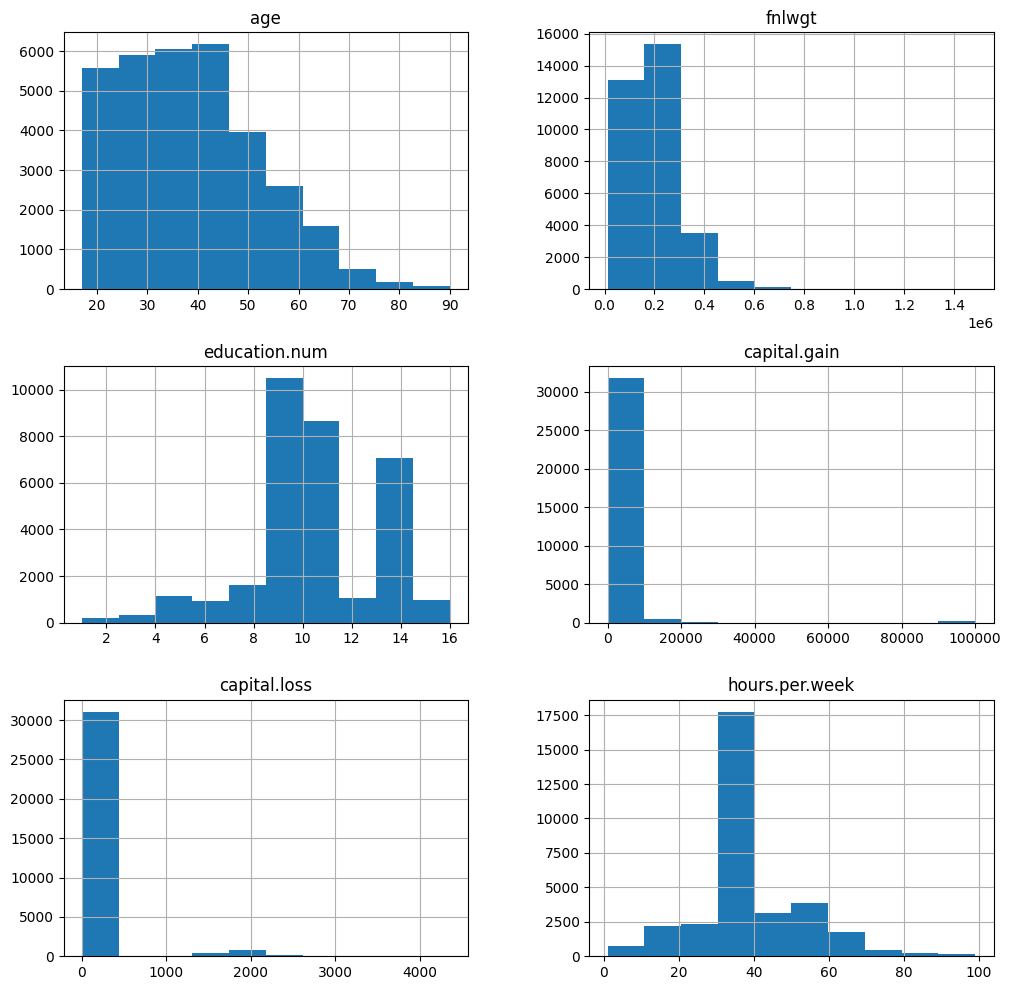

In [196]:
rcParams['figure.figsize'] = 12, 12
df[['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']].hist()

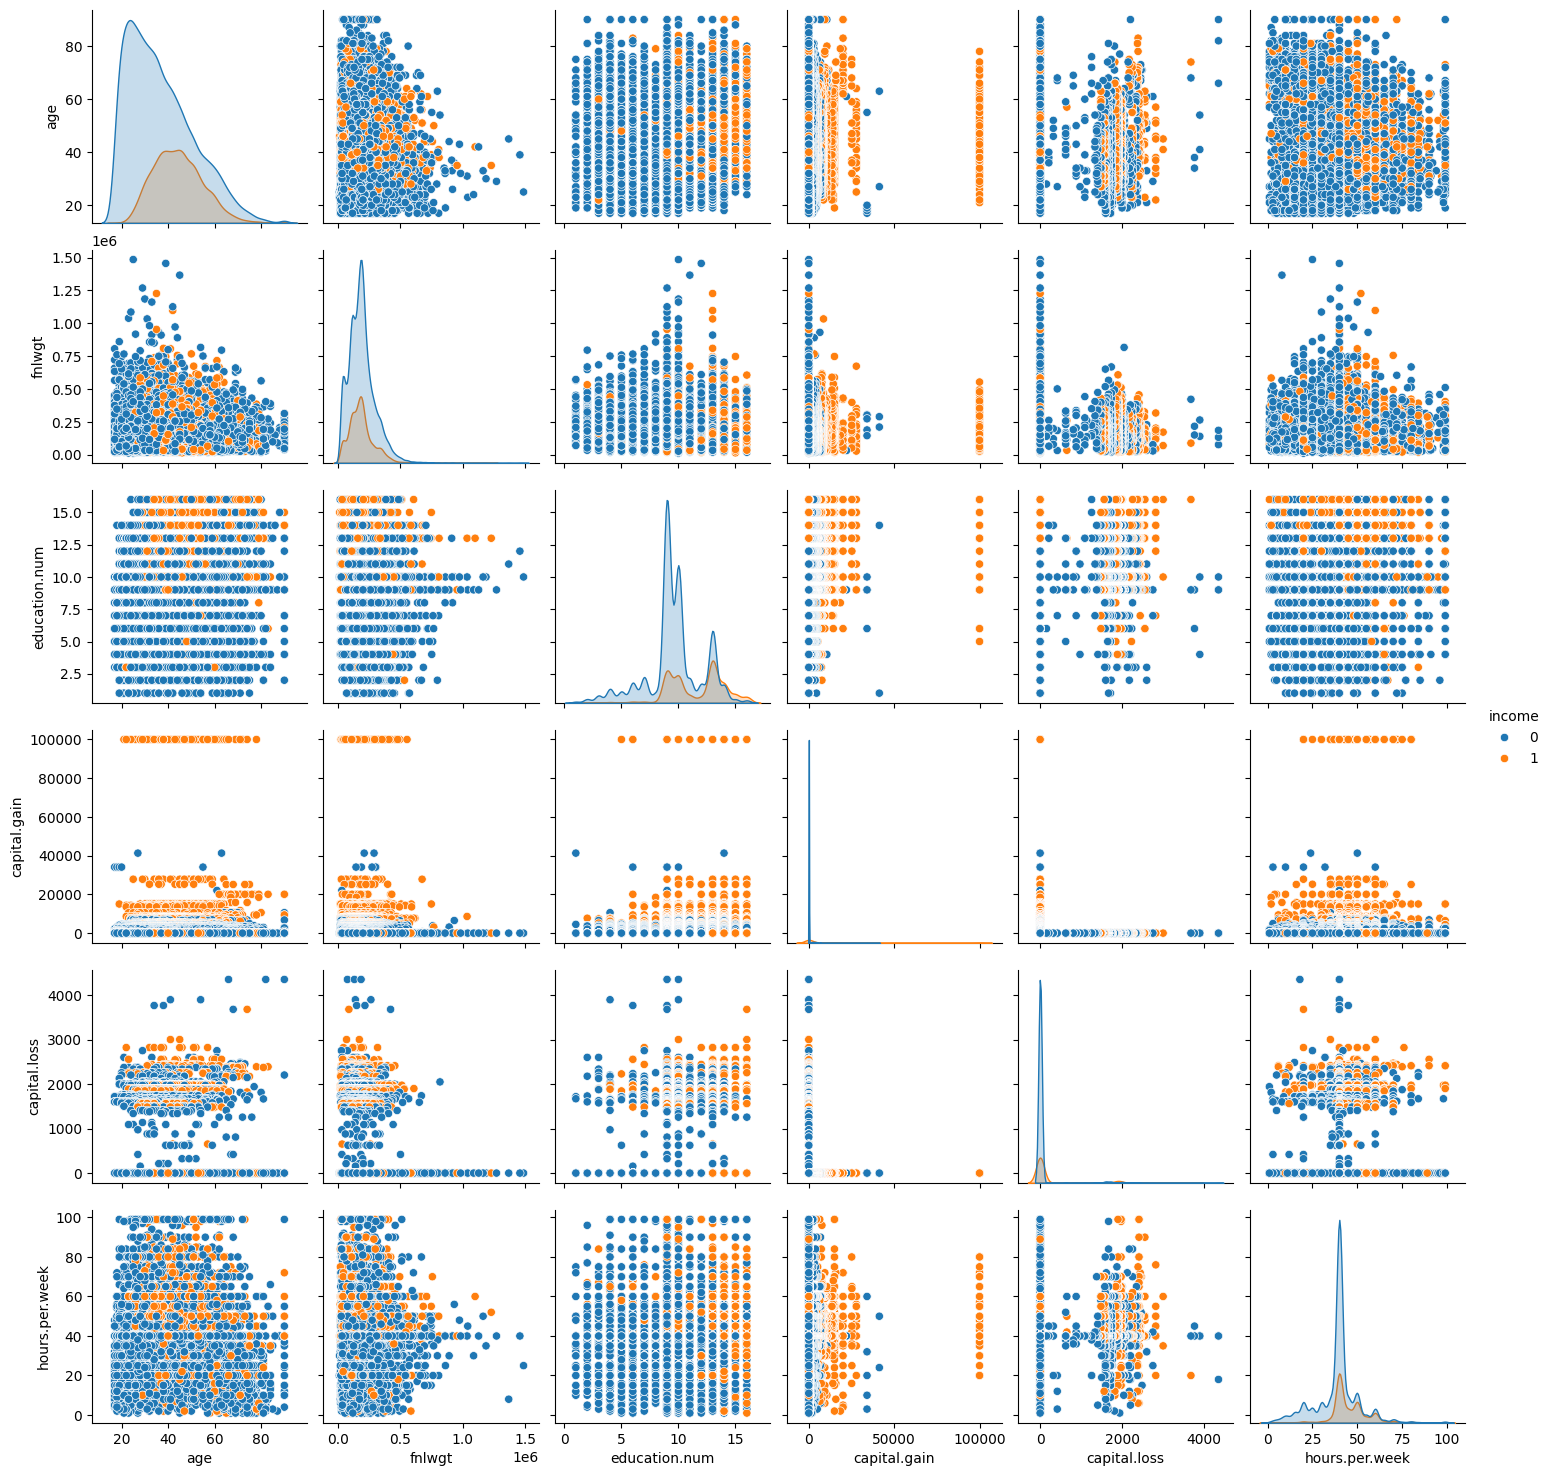

In [197]:
sns.pairplot(df, hue="income")
plt.show()


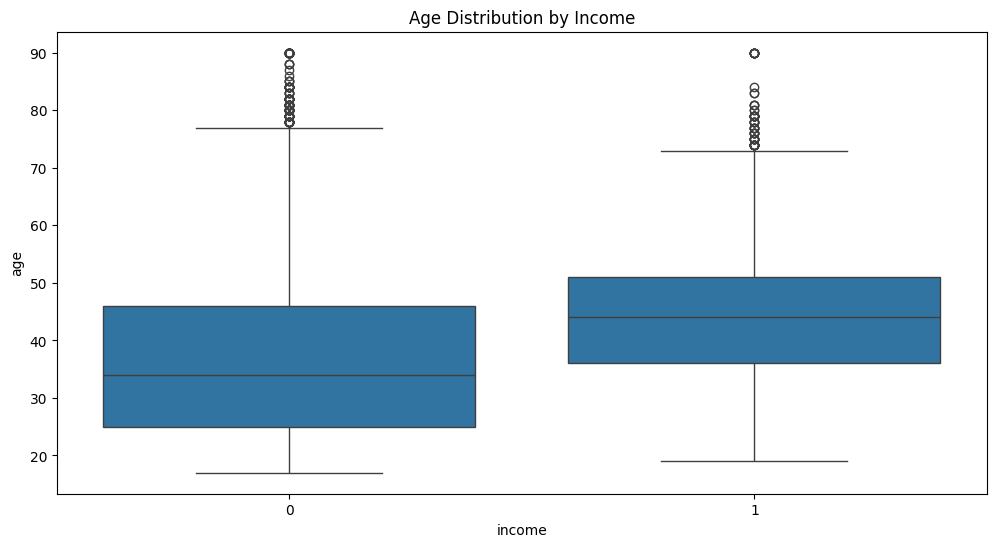

In [198]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="income", y="age", data=df)
plt.title('Age Distribution by Income')
plt.show()

C:\Users\84356\AppData\Local\Temp\ipykernel_22100\855296744.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['income'] == 0]['age'], label='<=50K', shade=True)
C:\Users\84356\AppData\Local\Temp\ipykernel_22100\855296744.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['income'] == 1]['age'], label='>50K', shade=True)


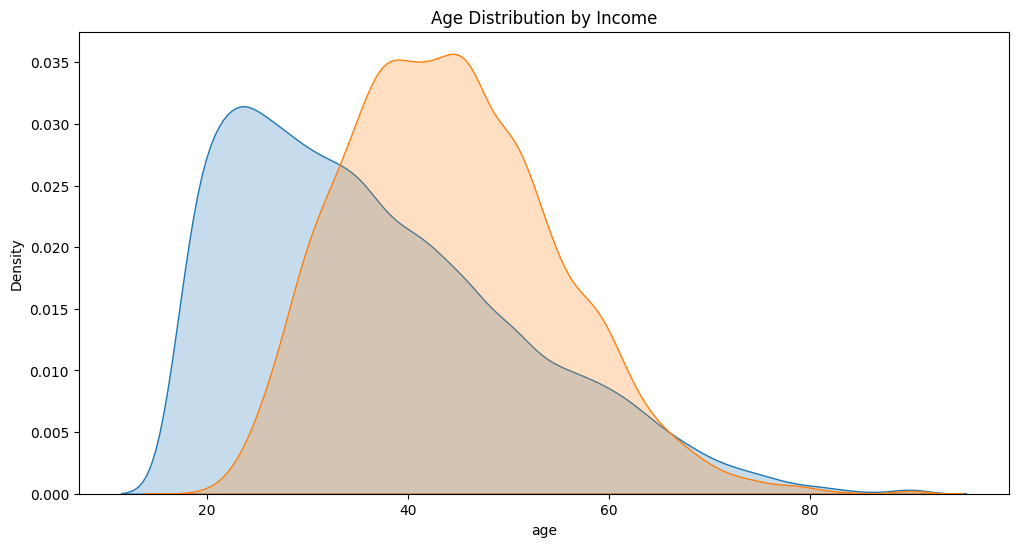

In [199]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['income'] == 0]['age'], label='<=50K', shade=True)
sns.kdeplot(df[df['income'] == 1]['age'], label='>50K', shade=True)
plt.title('Age Distribution by Income')
plt.show()

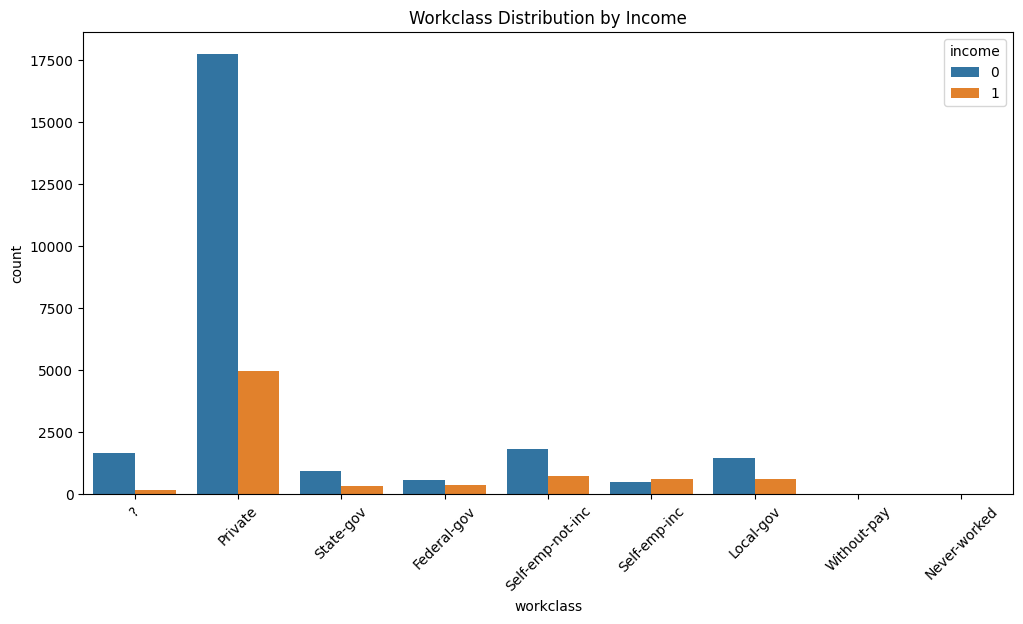

In [200]:
plt.figure(figsize=(12, 6))
sns.countplot(x='workclass', hue='income', data=df)
plt.title('Workclass Distribution by Income')
plt.xticks(rotation=45)
plt.show()

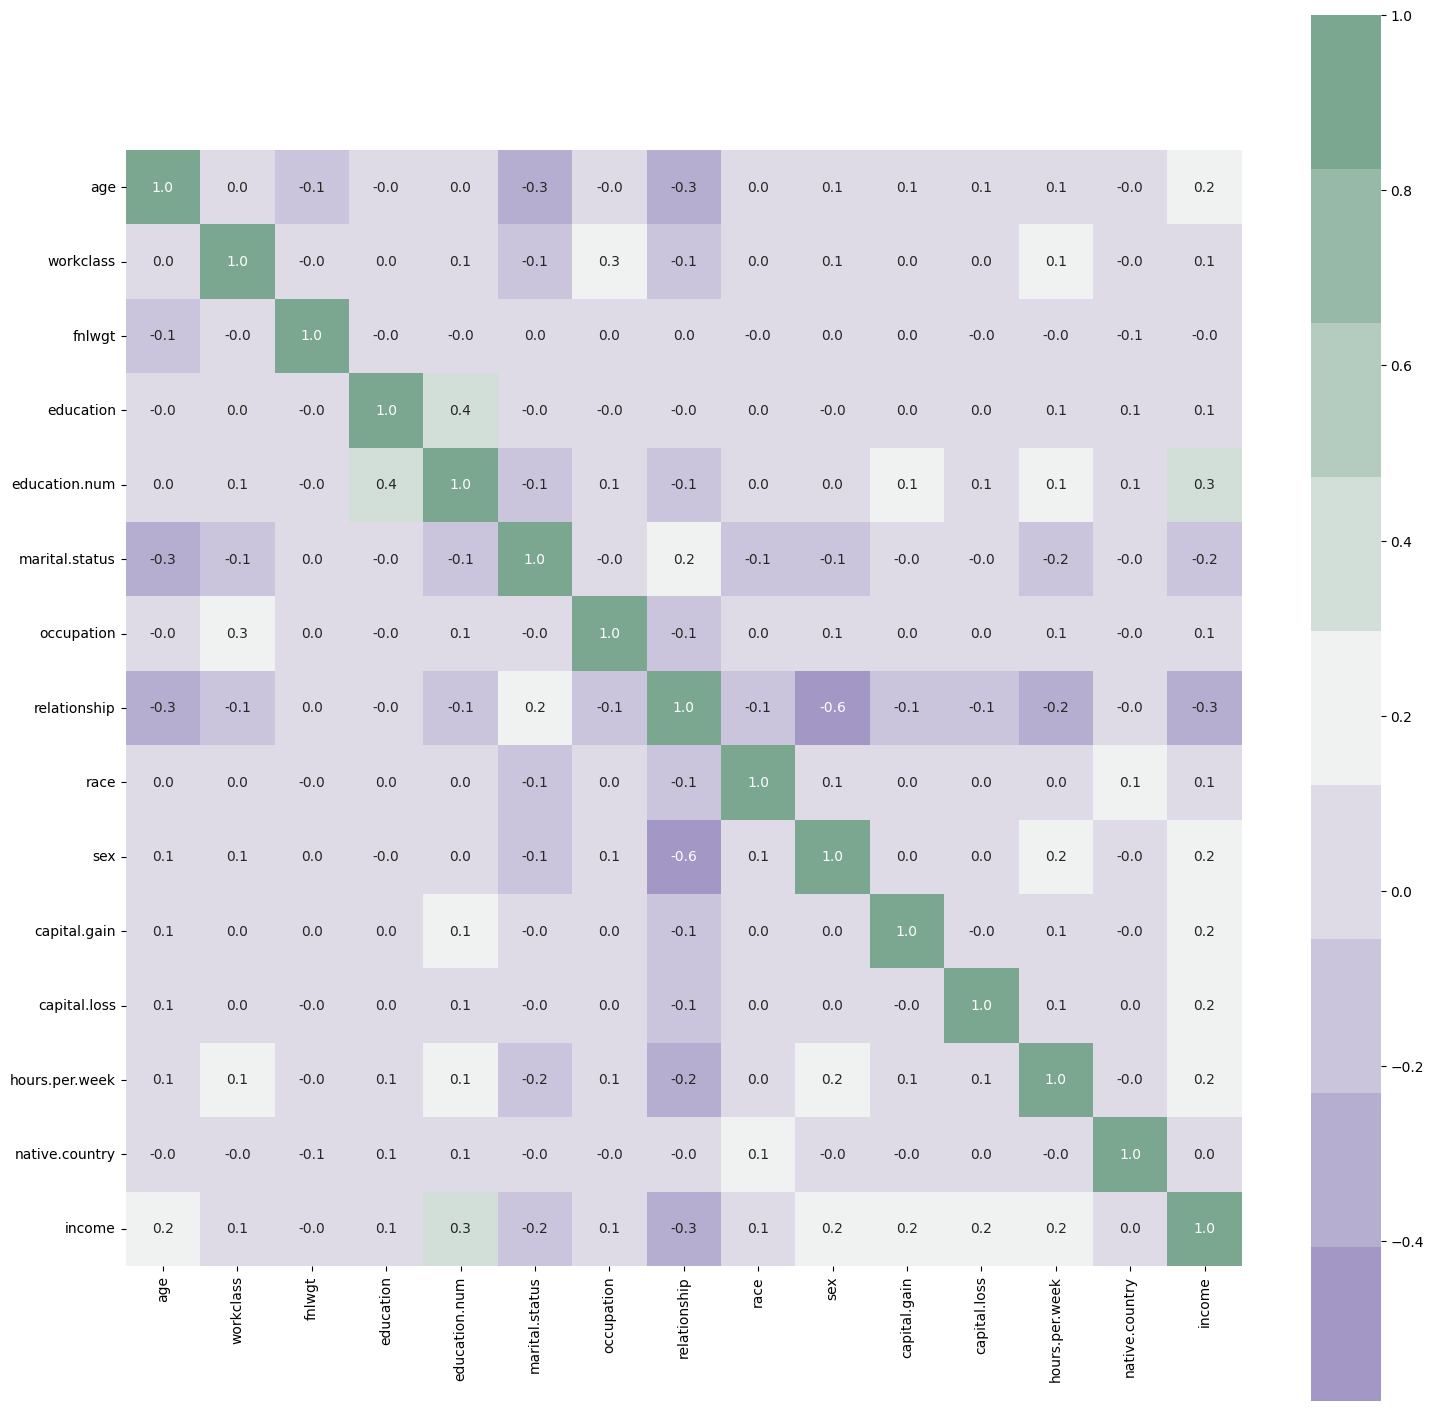

In [201]:
df_encoded = df.copy()

# Tạo một instance của LabelEncoder
encoder = LabelEncoder()

for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object': 
        df_encoded[column] = encoder.fit_transform(df_encoded[column]) 

correlation_matrix = df_encoded.corr()

cmap = sns.diverging_palette(275, 150, s=40, l=65, n=9)
plt.subplots(figsize=(18, 18))
sns.heatmap(correlation_matrix, cmap=cmap, annot=True, square=True, fmt=".1f")
plt.show()

In [202]:
df.drop(['fnlwgt'], axis = 1, inplace = True)

In [203]:
dataset=df.copy()

In [204]:
dataset['age'] = pd.cut(dataset['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

<Axes: xlabel='income', ylabel='count'>

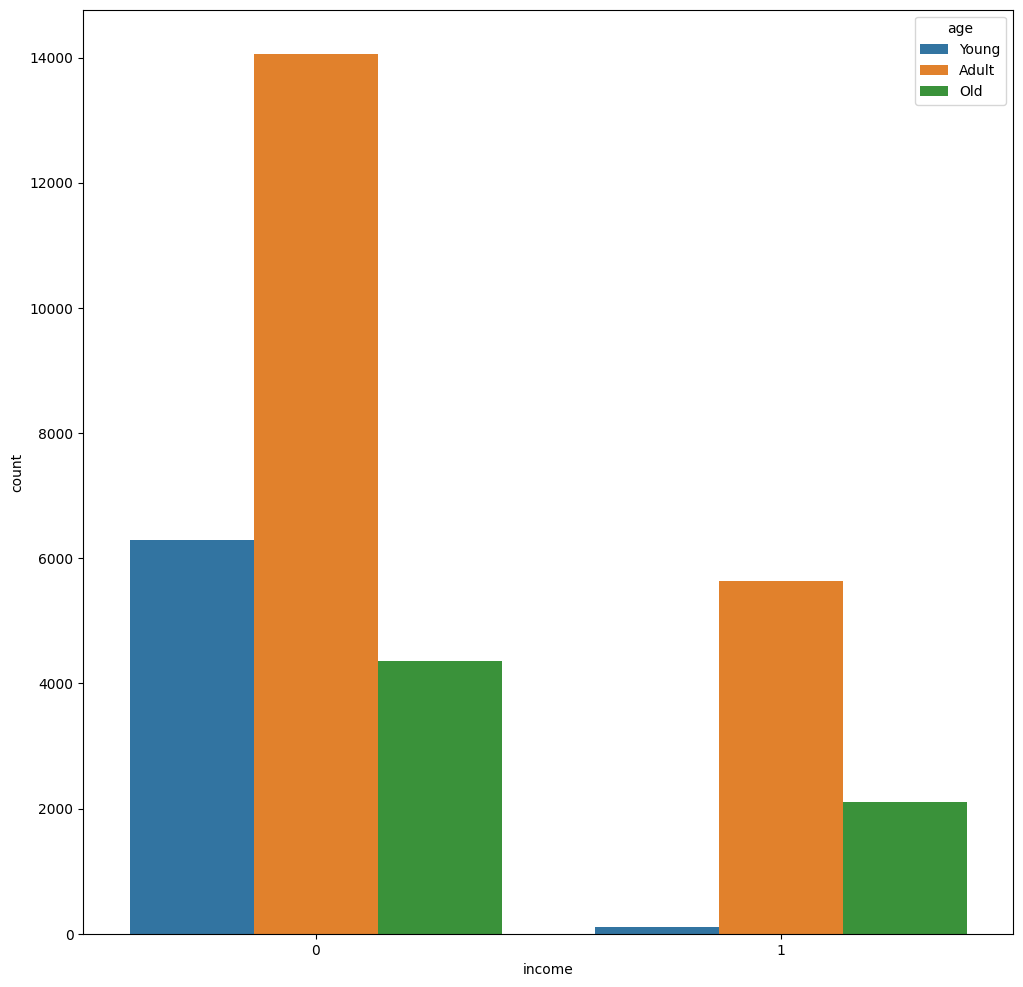

In [205]:
sns.countplot(x = 'income', hue = 'age', data = dataset)

In [206]:
dataset['Capital Diff'] = dataset['capital.gain'] - dataset['capital.loss']
dataset.drop(['capital.gain'], axis = 1, inplace = True)
dataset.drop(['capital.loss'], axis = 1, inplace = True)

<Axes: xlabel='income', ylabel='count'>

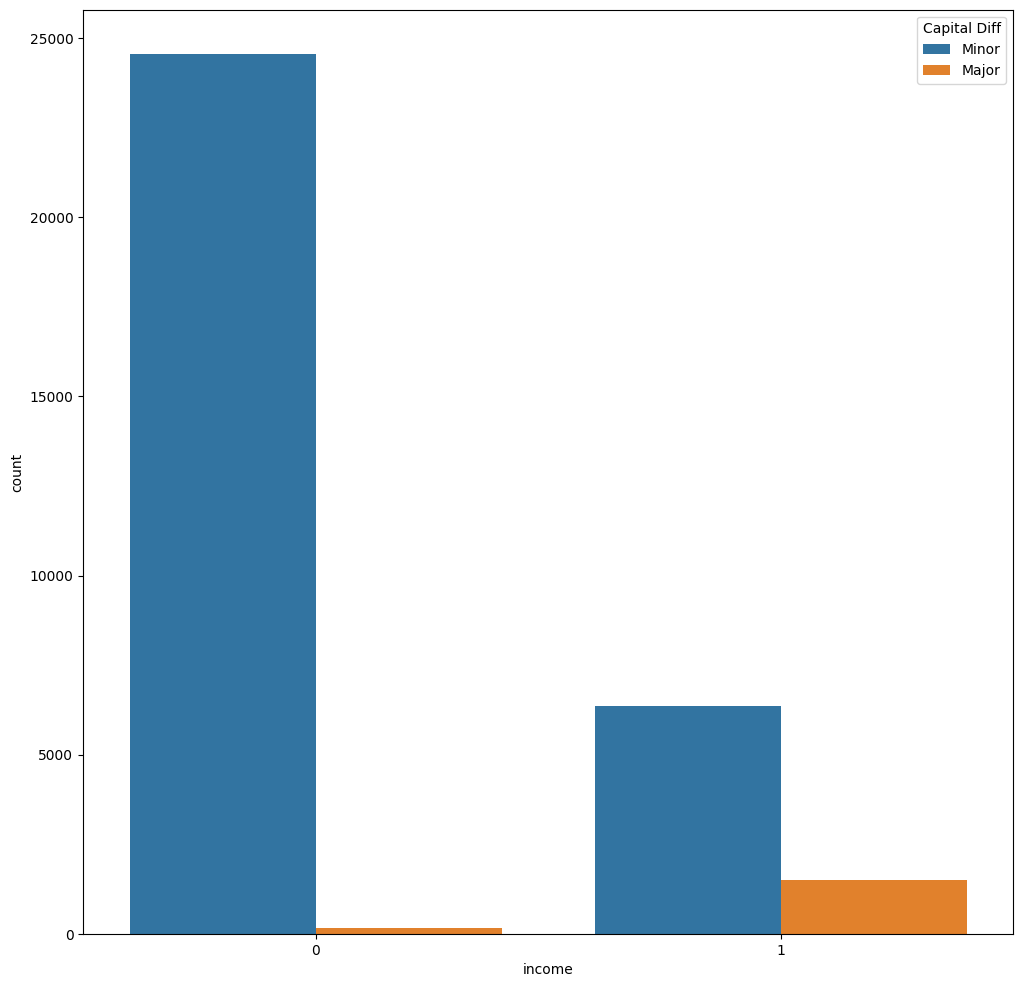

In [207]:
dataset['Capital Diff'] = pd.cut(dataset['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'income', hue = 'Capital Diff', data = dataset)

In [208]:
#Dividing hours of week in 3 major range and plotting it corresponding to the income

dataset['Hours per Week'] = pd.cut(dataset['hours.per.week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

<Axes: xlabel='income', ylabel='count'>

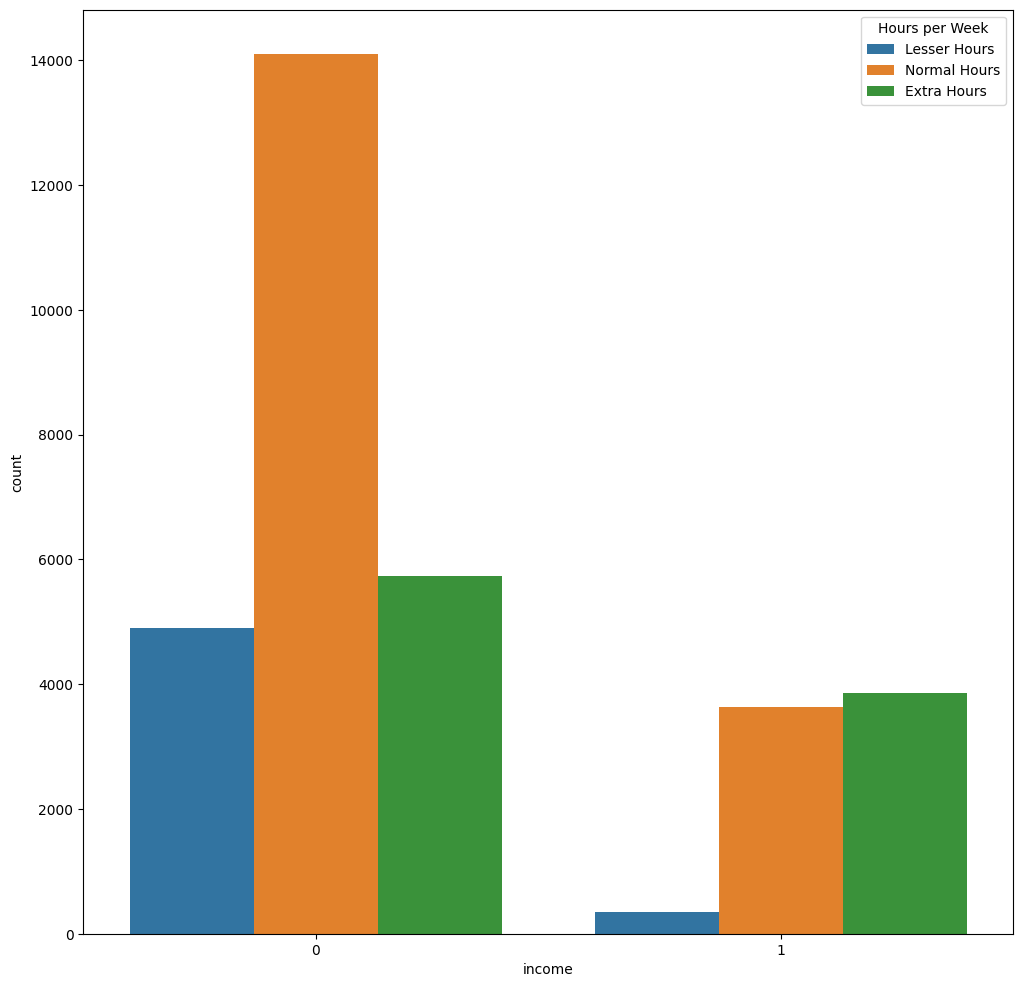

In [209]:
sns.countplot(x = 'income', hue = 'Hours per Week', data = dataset)


<Axes: xlabel='income', ylabel='count'>

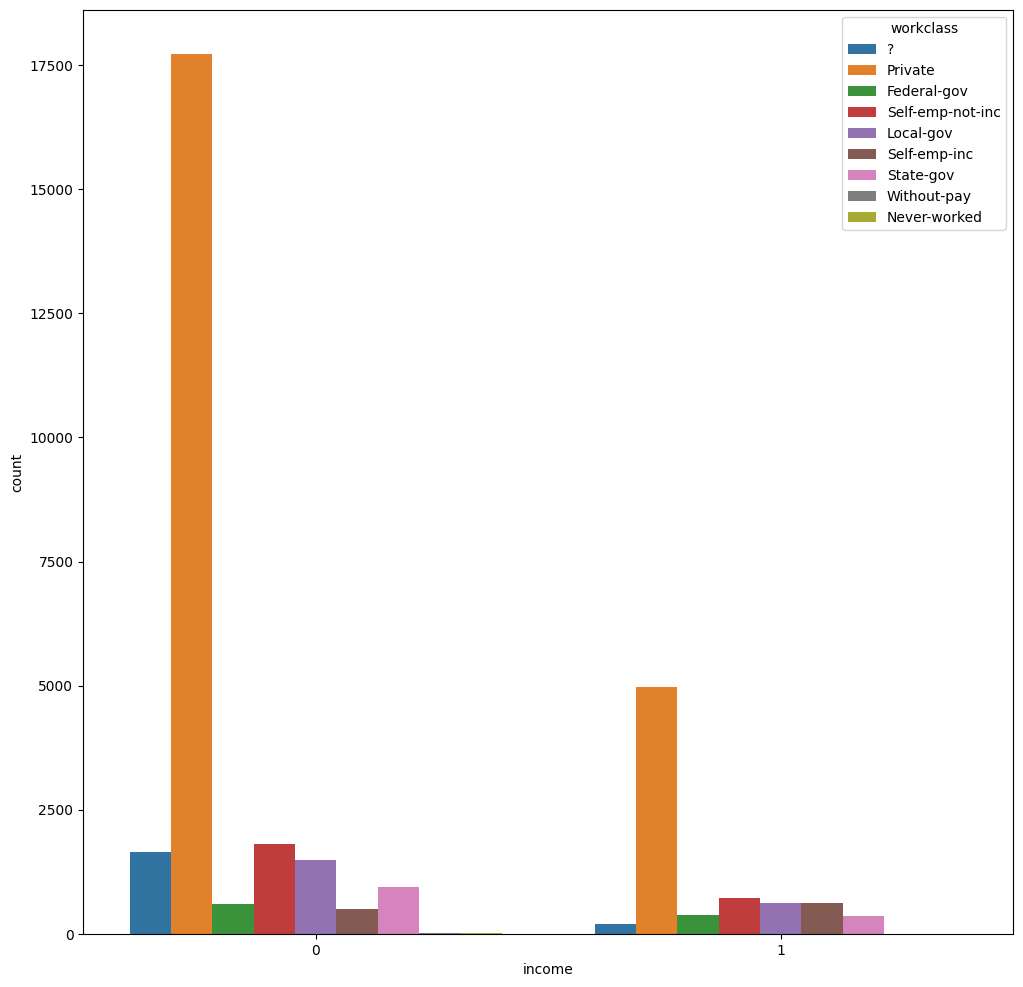

In [210]:
#Plotting workclass corresponding to the income

sns.countplot(x = 'income', hue = 'workclass', data = dataset)

<Axes: xlabel='income', ylabel='count'>

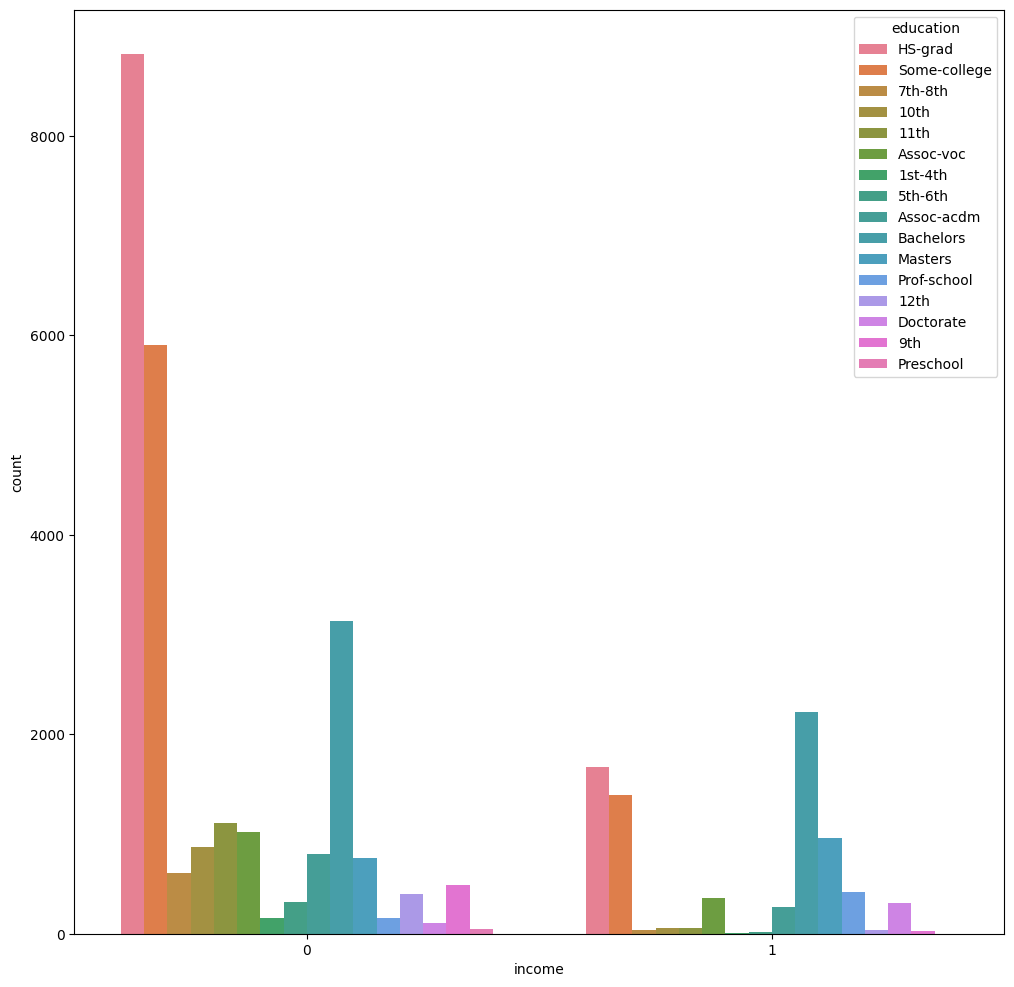

In [211]:
#Plot of education corresponding to income

sns.countplot(x = 'income', hue = 'education', data = dataset)

In [212]:
df.drop(['education.num'], axis = 1, inplace = True)
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)
df['education'].value_counts()

C:\Users\84356\AppData\Local\Temp\ipykernel_22100\1737220808.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],


education
HS-grad         10501
Some-college     7291
Bachelors        5355
 School          4253
Masters          1723
Assoc-voc        1382
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Name: count, dtype: int64

<Axes: xlabel='income', ylabel='count'>

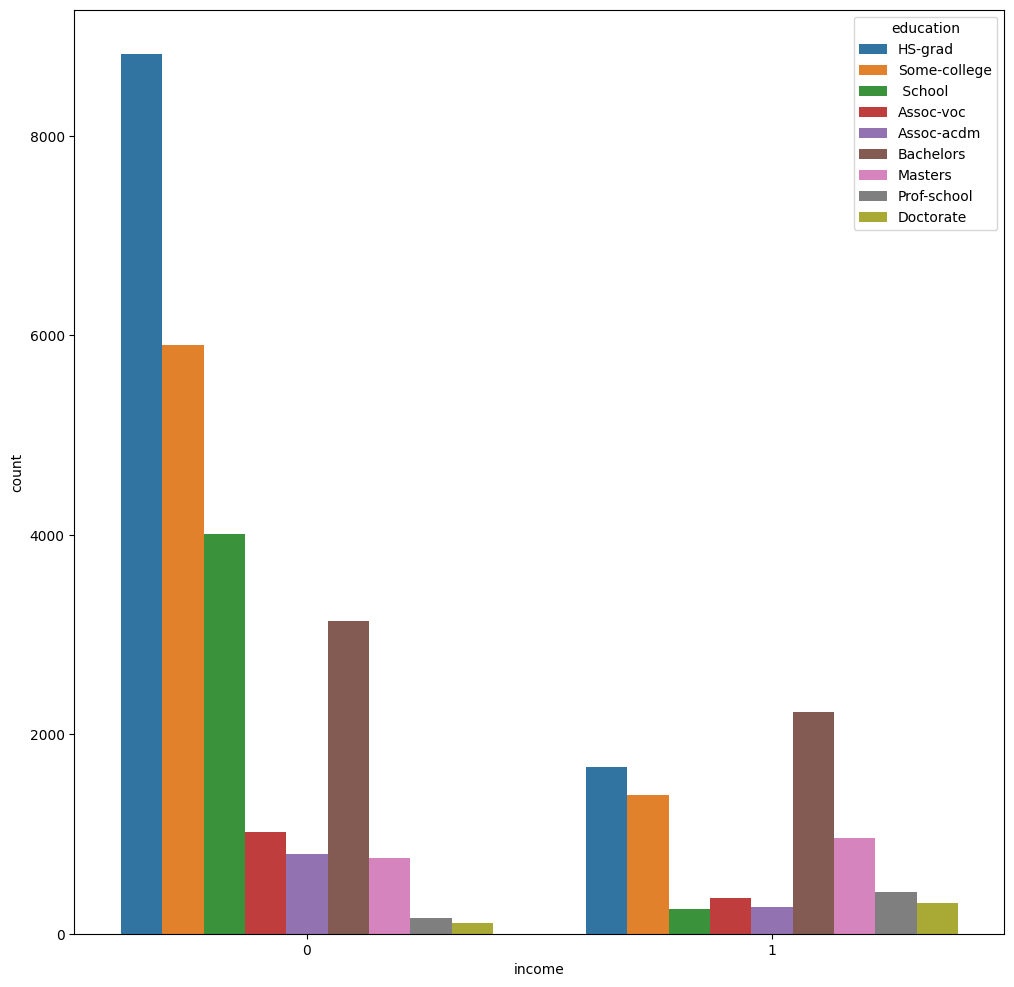

In [213]:
sns.countplot(x = 'income', hue = 'education', data = df)

<Axes: xlabel='income', ylabel='count'>

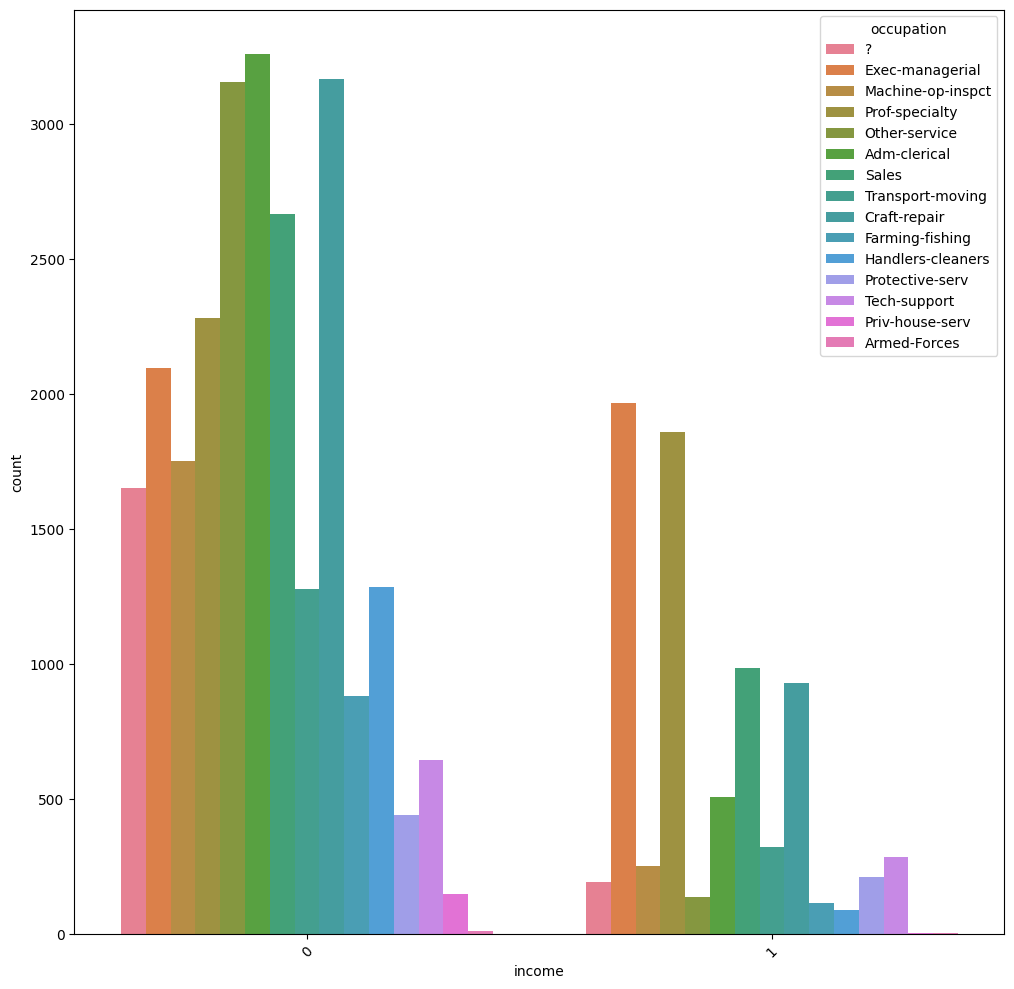

In [214]:
plt.xticks(rotation = 45)
sns.countplot(x = 'income', hue = 'occupation', data = dataset)

<Axes: xlabel='income', ylabel='count'>

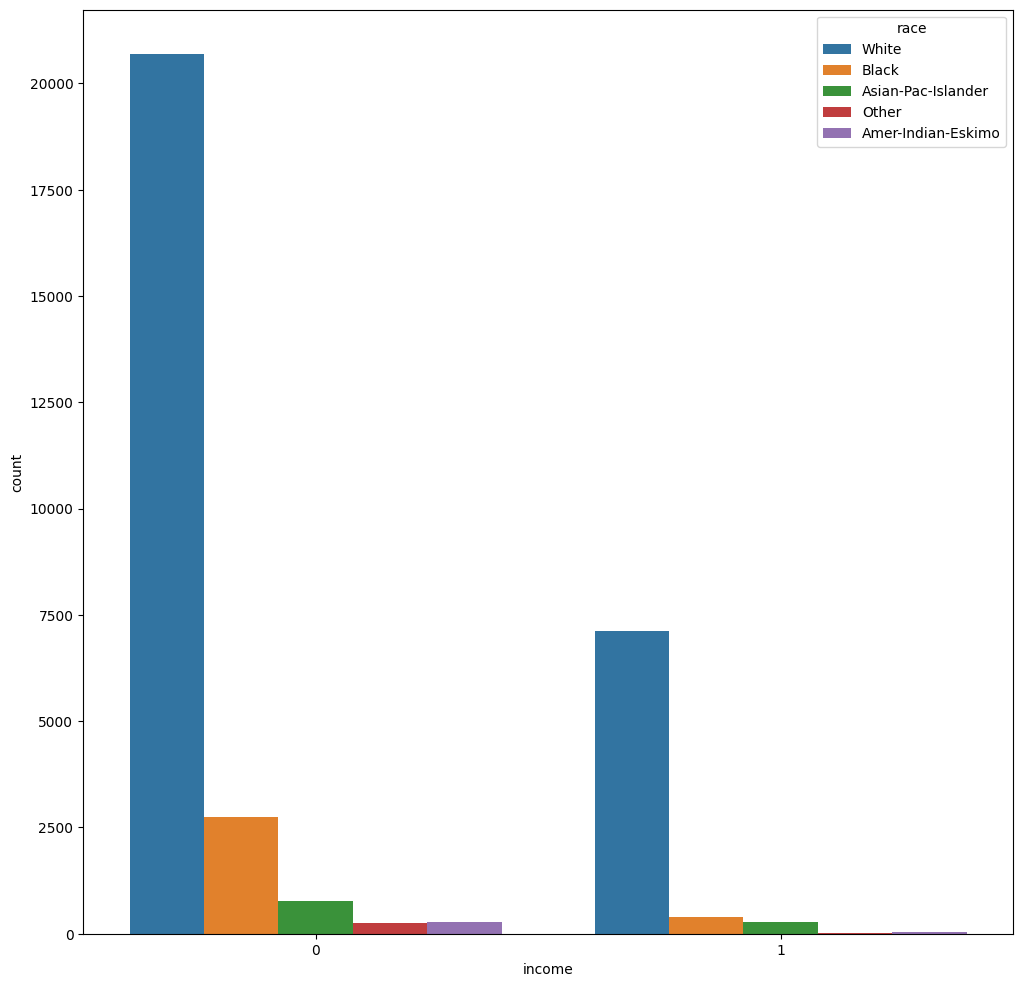

In [215]:
sns.countplot(x = 'income', hue = 'race', data = dataset)

In [216]:
df['race'].unique()
df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

C:\Users\84356\AppData\Local\Temp\ipykernel_22100\3643650470.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)


<Axes: xlabel='income', ylabel='count'>

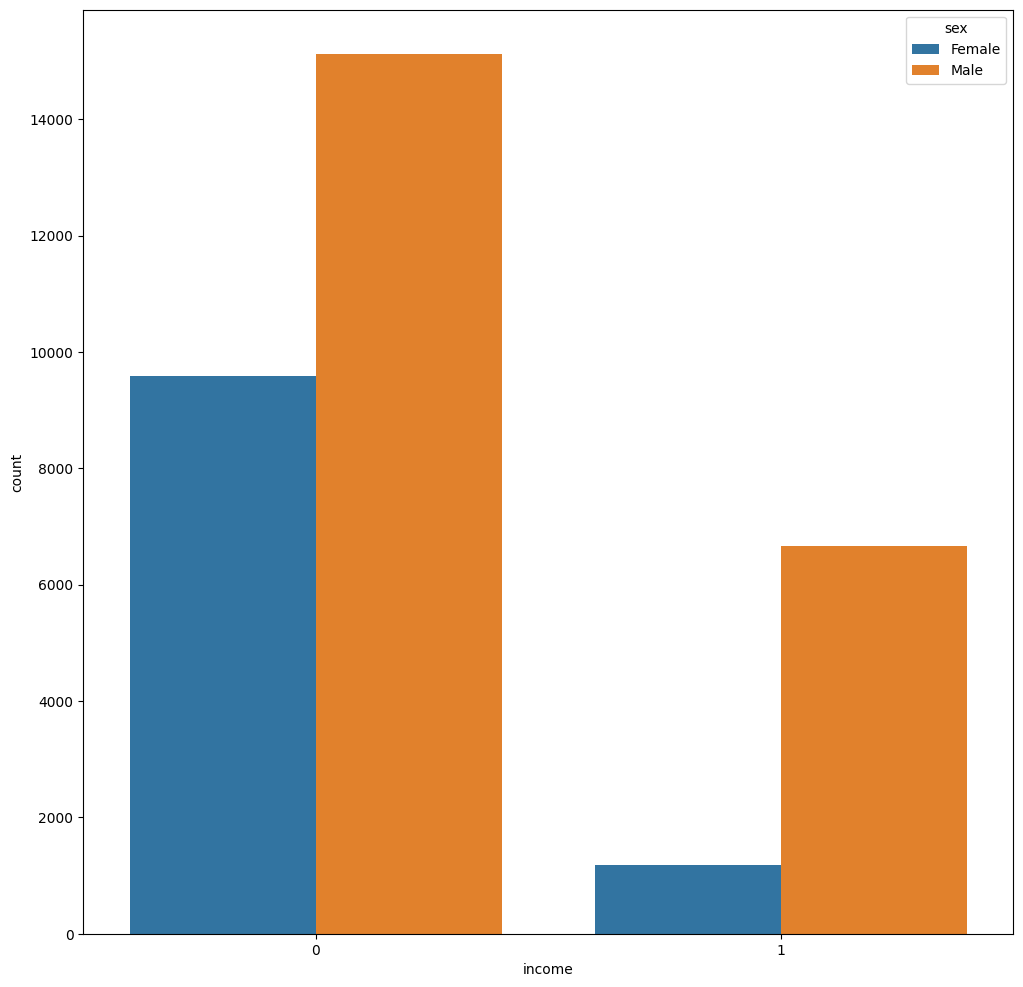

In [217]:
sns.countplot(x = 'income', hue = 'sex', data = dataset)

In [218]:
count = dataset['native.country'].value_counts()
count

native.country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

Text(0.5, 1.0, 'Count from each Country')

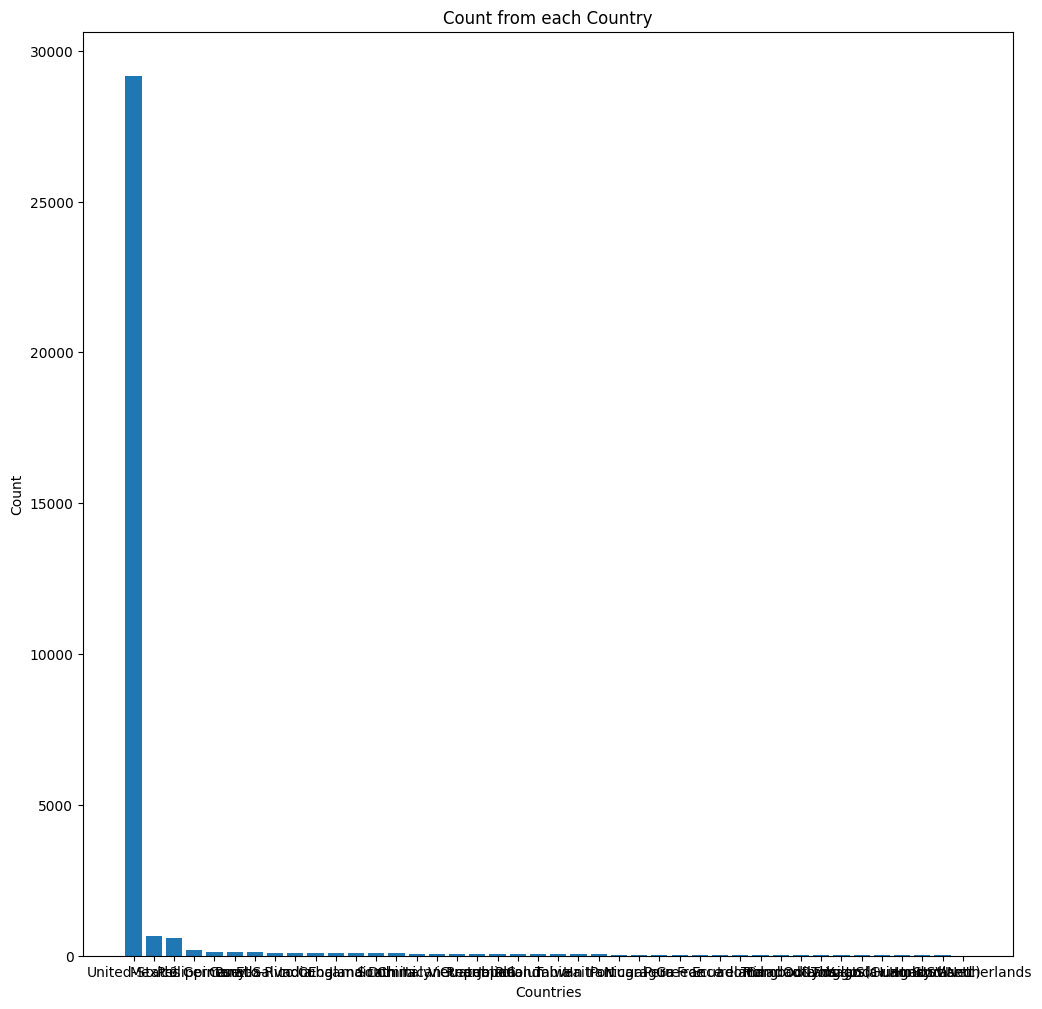

In [219]:
#Plot of Country corresponding to income


plt.bar(count.index, count.values)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Count from each Country')

In [220]:
countries = np.array(dataset['native.country'].unique())
countries = np.delete(countries, 0)

In [221]:
dataset['native.country'].replace(countries, 'Other', inplace = True)
df['native.country'].replace(countries, 'Other', inplace = True)

C:\Users\84356\AppData\Local\Temp\ipykernel_22100\4202278681.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['native.country'].replace(countries, 'Other', inplace = True)
C:\Users\84356\AppData\Local\Temp\ipykernel_22100\4202278681.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

<Axes: xlabel='native.country', ylabel='count'>

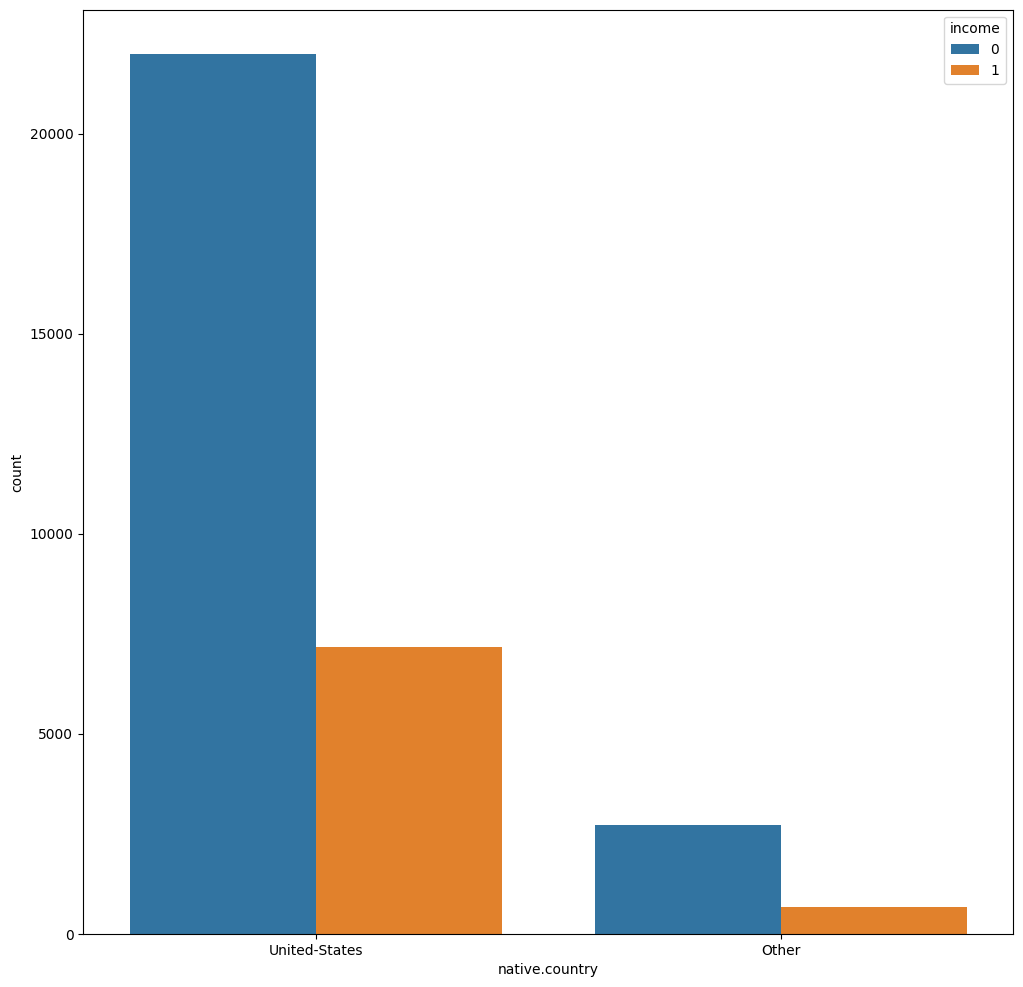

In [222]:
sns.countplot(x = 'native.country', hue = 'income', data = dataset)

In [223]:
X = df.drop(['income'], axis=1)
Y = df['income']

In [224]:
X.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,?,HS-grad,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,?,Some-college,Widowed,?,Unmarried,Other,Female,0,4356,40,United-States
3,54,Private,School,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [225]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [226]:
from sklearn import preprocessing

categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship','race', 'sex','native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [227]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [228]:
X_train.head()


,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.134215,-0.577377,-0.402341,-0.600270,2.214196,0.412408,-1.430470,-0.145189,-0.217407,-1.662414,0.342505
1,0.028248,-1.279379,0.193090,-0.402341,0.109933,-0.899410,0.412408,0.699071,-0.145189,-0.217407,-0.200753,0.342505
2,0.247956,0.086059,1.348790,0.926666,-0.600270,-0.276689,0.412408,-1.430470,-0.145189,-0.217407,-0.038346,0.342505
3,-0.850587,-1.279379,0.193090,0.926666,-0.363535,0.968753,0.412408,0.699071,-0.145189,-0.217407,-0.038346,0.342505
4,-0.044989,-1.962098,0.578323,-0.402341,-0.600270,-0.899410,0.412408,0.699071,-0.145189,-0.217407,-0.038346,0.342505


In [229]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [230]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [231]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train) 
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [232]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [233]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

c:\Users\84356\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\84356\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [234]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [235]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300)
mlp.fit(X_train, Y_train)
Y_pred_mlp = mlp.predict(X_test)
acc_mlp = round(mlp.score(X_train, Y_train) * 100, 2)

In [236]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Decision Tree', 'Fully Connected Neural Network'],
    'Score': [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_decision_tree, acc_mlp]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
print(result_df.head(7))

                                Model
Score                                
98.05                   Decision Tree
98.04                   Random Forest
90.11  Fully Connected Neural Network
89.72                             KNN
80.55         Support Vector Machines
80.37             Logistic Regression
79.72                     Naive Bayes


In [237]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
age,0.225
capital.gain,0.133
hours.per.week,0.116
education,0.102
relationship,0.100
occupation,0.098
marital.status,0.088
workclass,0.054
capital.loss,0.046


<Axes: xlabel='feature'>

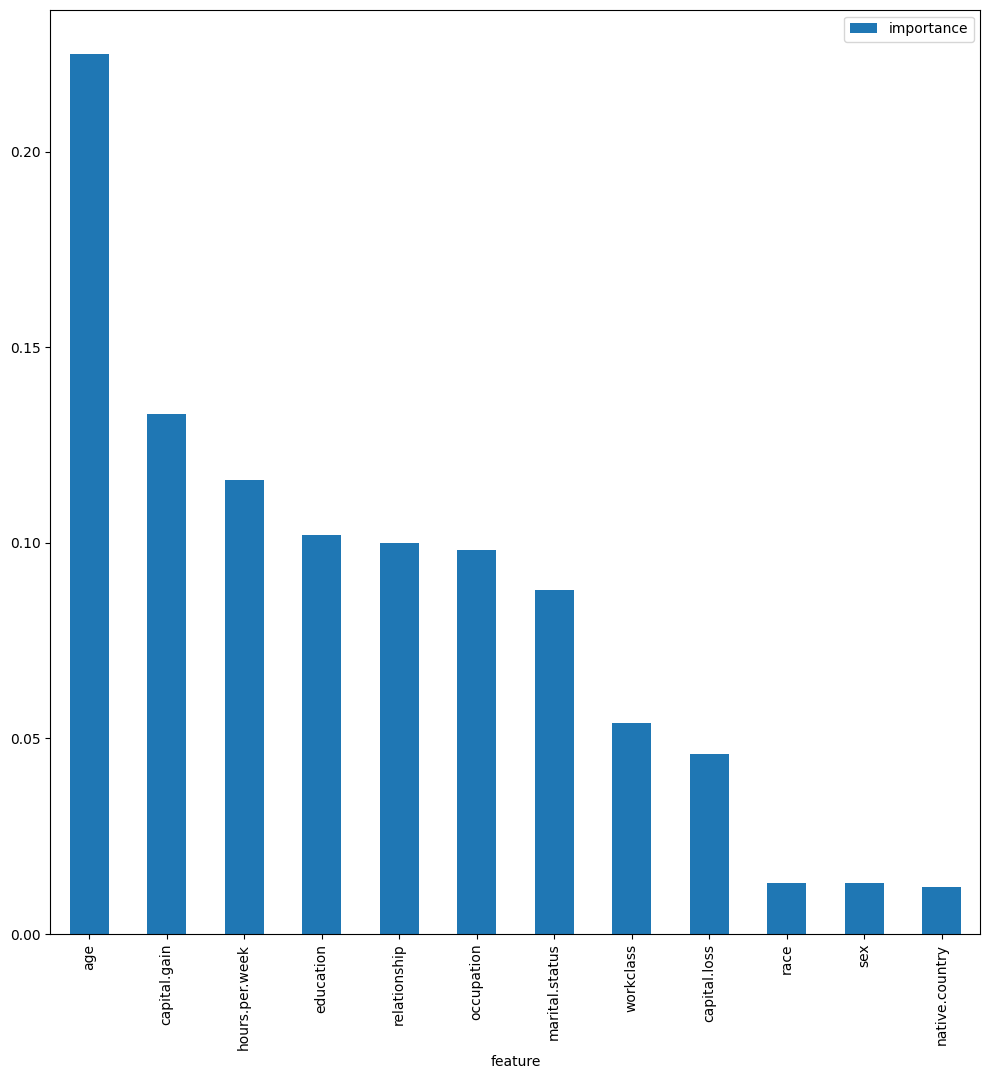

In [238]:
importances.plot.bar()

In [239]:
df  = df.drop("sex", axis=1)
df  = df.drop("race", axis=1)
df  = df.drop("native.country", axis=1)

In [240]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

98.05 %
